# Home Cage Interaction Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc_csvs"

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac_csvs"

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n1-240508-080051\Notes.txt
read from t=0s to t=1783.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n2-240508-092906\Notes.txt
read from t=0s to t=1810.33s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n3-240509-062454\Notes.txt
read from t=0s to t=1803.43s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n4-240509-075317\Notes.txt
read from t=0s to t=1802.32s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n5-240823-085032\Notes.txt
read from t=0s to t=1789.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n6-240823-101436\Notes.txt
read from t=0s to t=1793.07s
Found Synapse note file: C:\

In [4]:
group_data.hc_processing()

Home Cage Processing n1-240508-080051...
Home Cage Processing n2-240508-092906...
Home Cage Processing n3-240509-062454...
Home Cage Processing n4-240509-075317...
Home Cage Processing n5-240823-085032...
Home Cage Processing n6-240823-101436...
Home Cage Processing n7-240824-062103...


c:\Users\alber\anaconda3\envs\photometry\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alber\anaconda3\envs\photometry\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Average Investigation Time Per bout

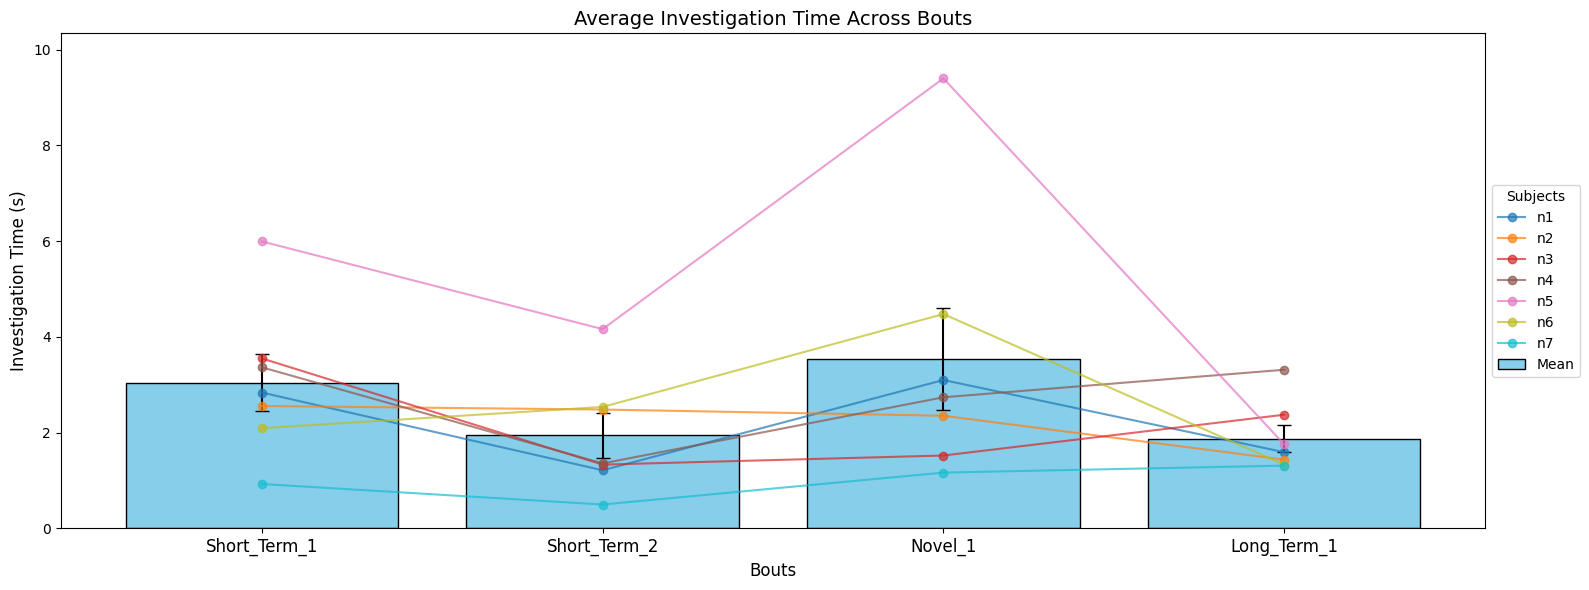

In [5]:
# Define the columns representing the bouts
columns = ['Short_Term_1', 'Short_Term_2', 'Novel_1', 'Long_Term_1']

avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Investigation')

plot_y_across_bouts(avg_inv_duration_df, 'Average Investigation Time Across Bouts','Investigation Time (s)')

## Average Total Investigation Duration per bout

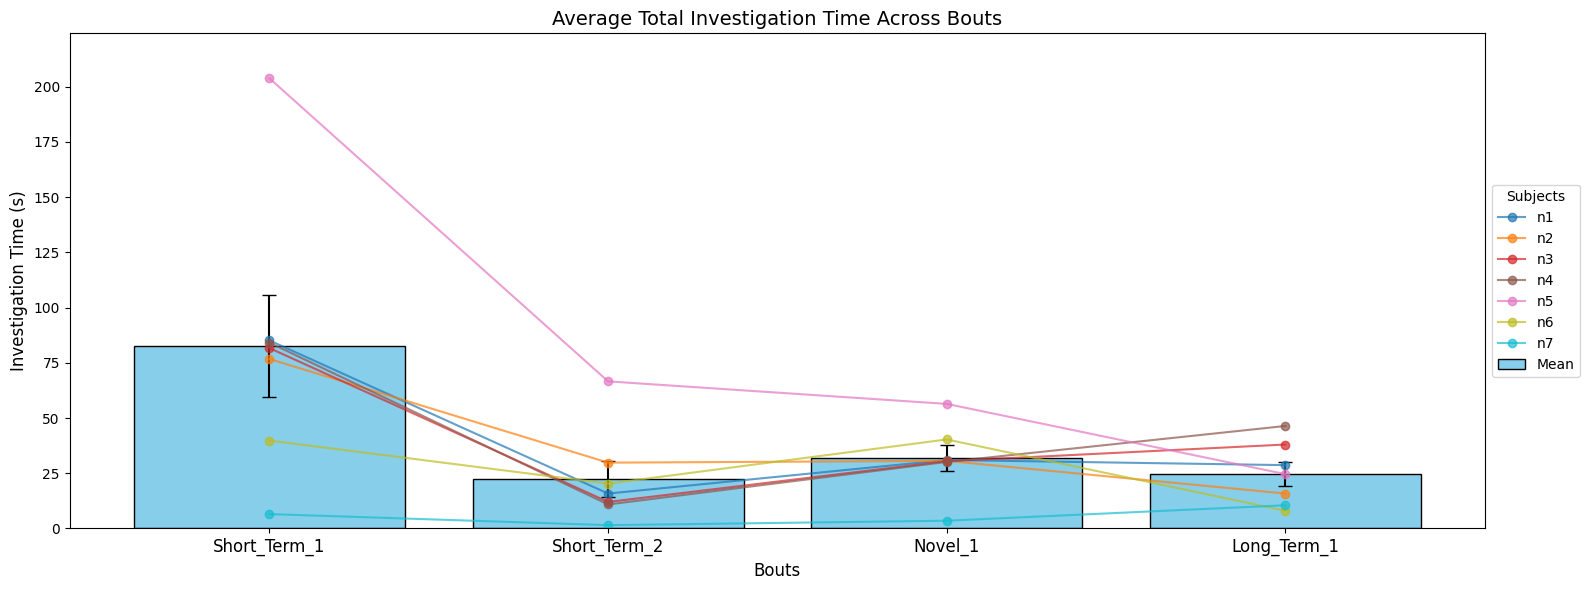

In [6]:
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Investigation')

plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)')

## Mean DA During 1st and 5th Investigation

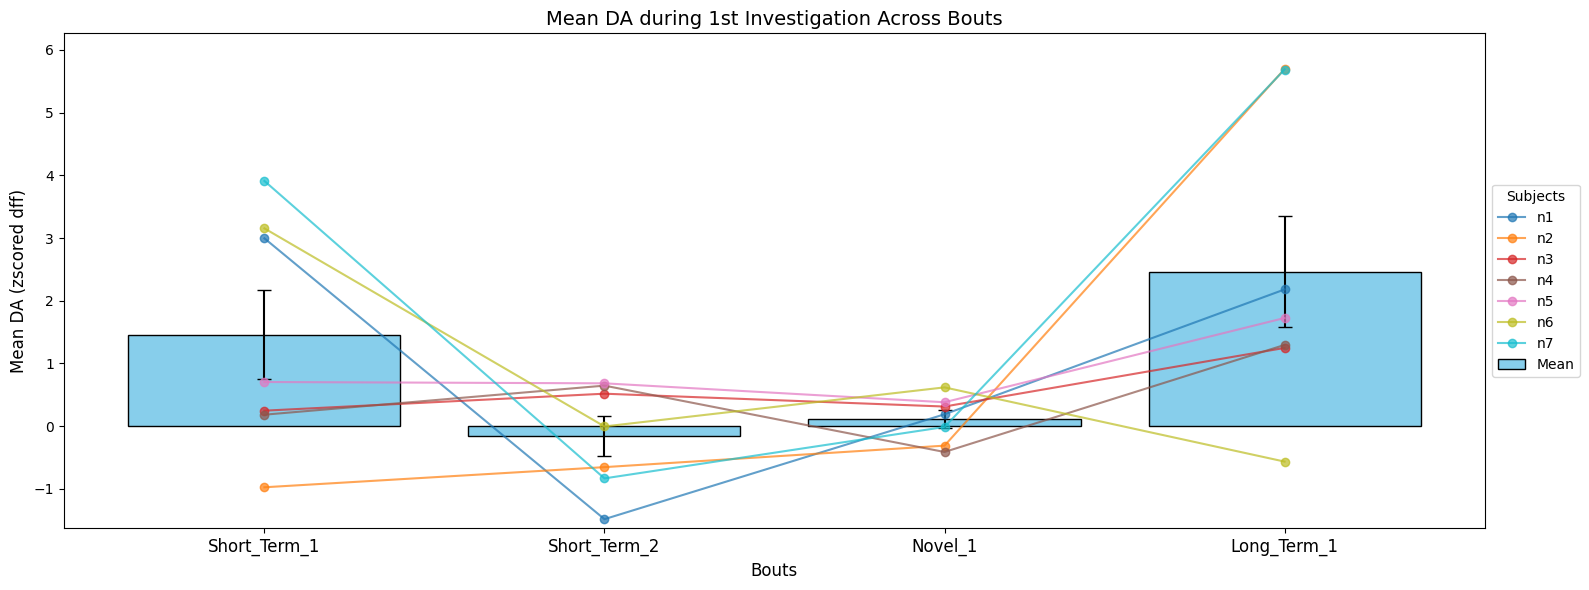

In [7]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=columns, behavior='Investigation', n = 1)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)')

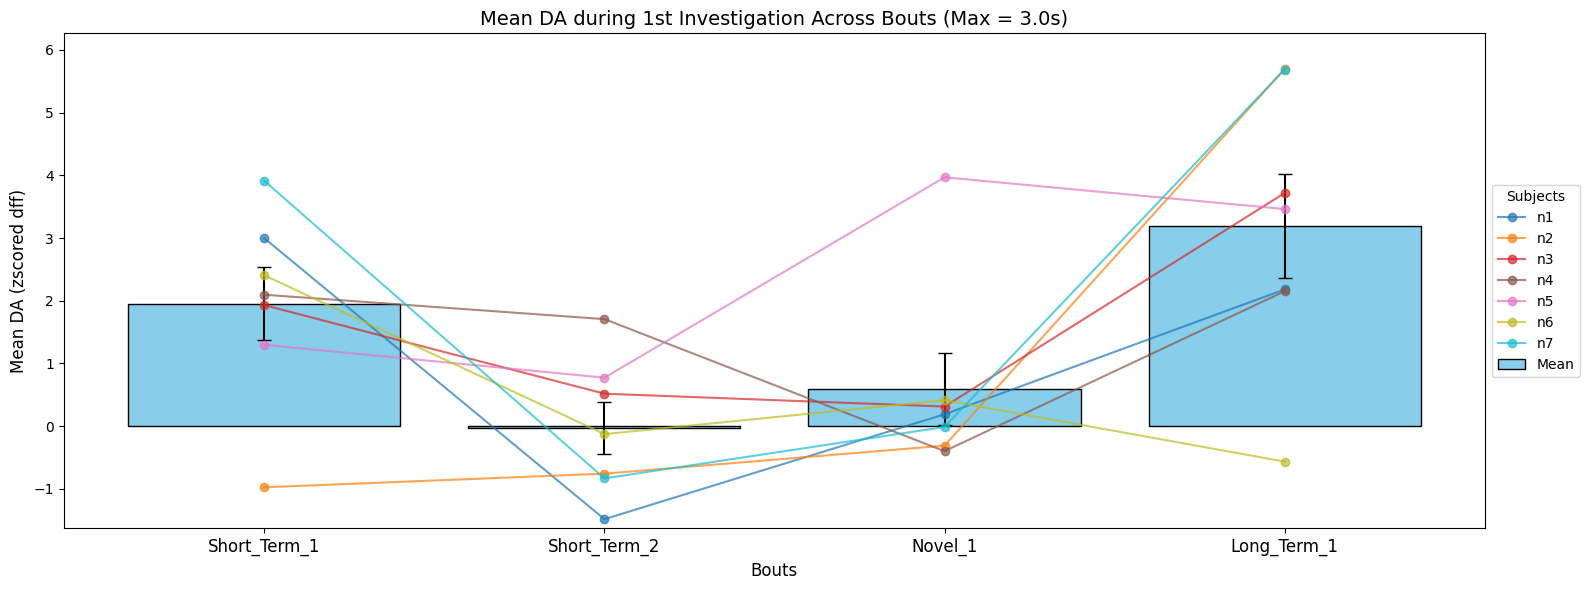

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=columns, behavior='Investigation', n =1, max_duration=3.0)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts (Max = 3.0s)','Mean DA (zscored dff)')


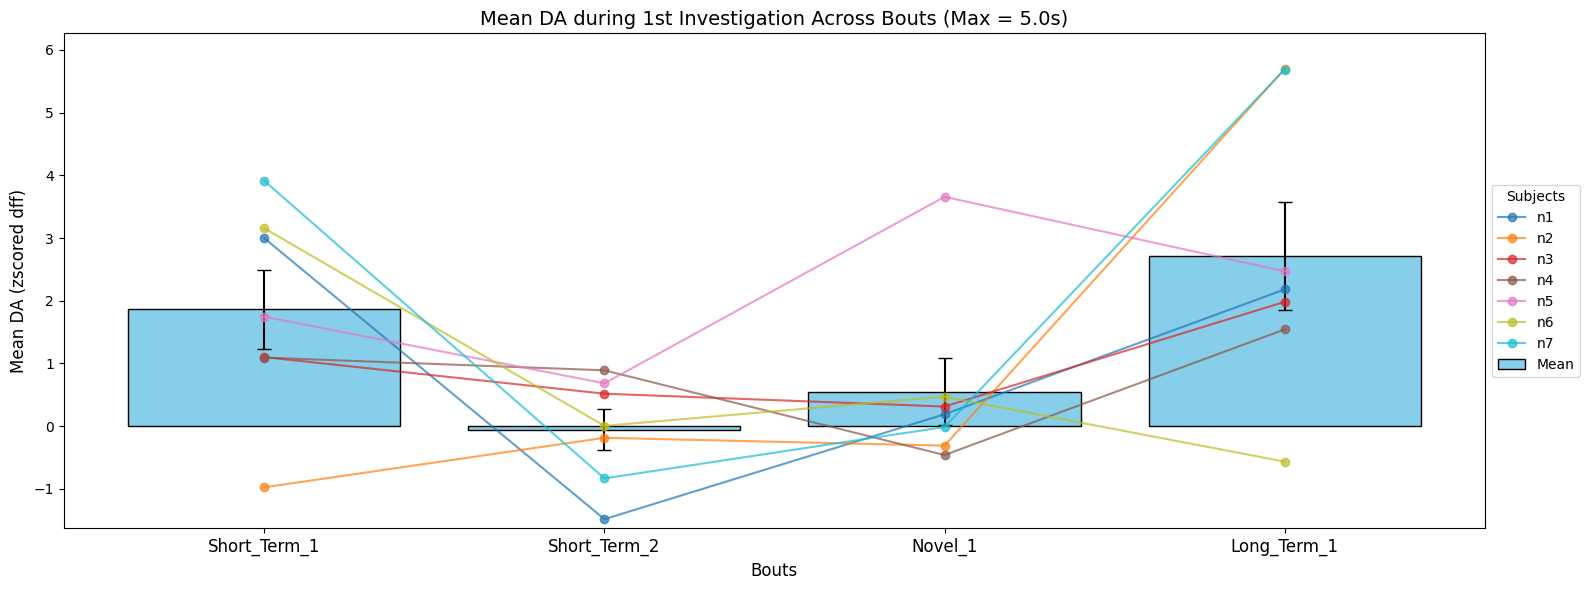

In [9]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=columns, behavior='Investigation', n =1, max_duration=5.0)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts (Max = 5.0s)','Mean DA (zscored dff)')


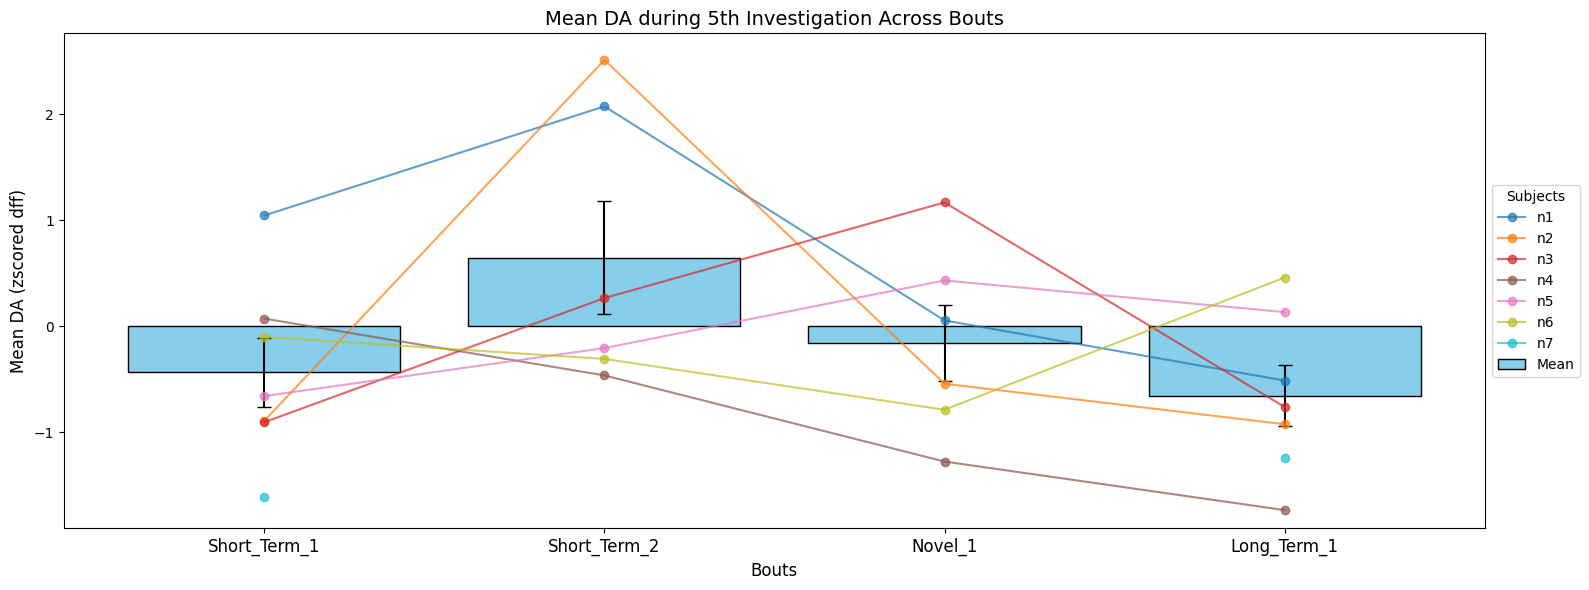

In [10]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=columns, behavior='Investigation', n = 5)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 5th Investigation Across Bouts','Mean DA (zscored dff)')

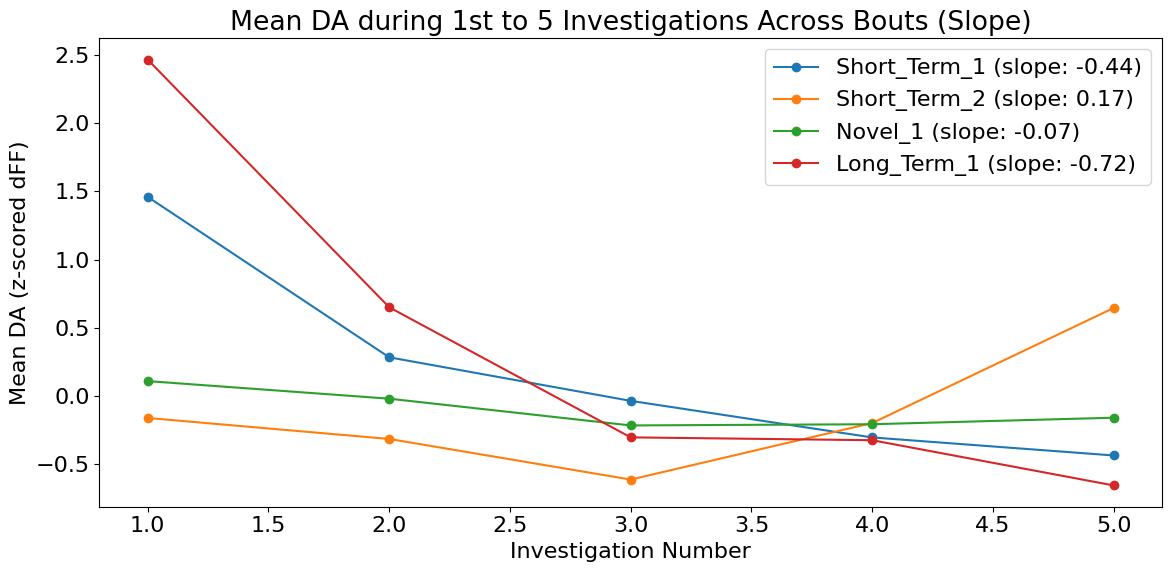

Slope for Short_Term_1: -0.44
Slope for Short_Term_2: 0.17
Slope for Novel_1: -0.07
Slope for Long_Term_1: -0.72


In [16]:
mean_da_df = extract_nth_to_mth_behavior_mean_da(group_data, columns , behavior='Investigation', n_start=1, n_end=5)
plot_meanDA_across_investigations(mean_da_df,columns, max_investigations=5, metric_type='slope')

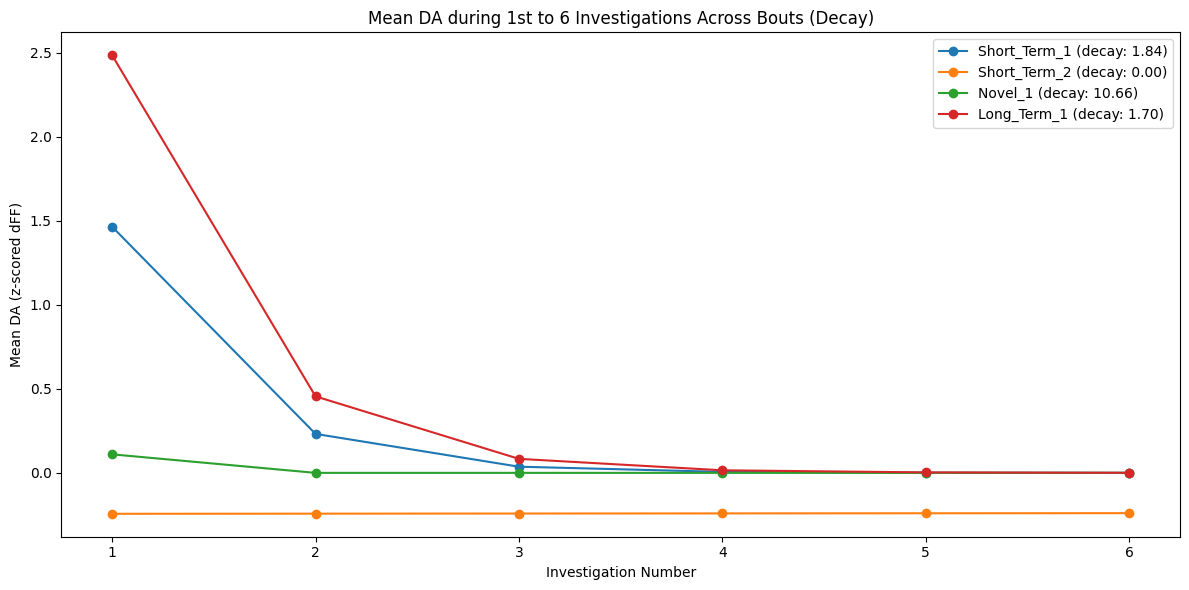

Decay constant for Short_Term_1: 1.8433
Decay constant for Short_Term_2: 0.0032
Decay constant for Novel_1: 10.6591
Decay constant for Long_Term_1: 1.6974


In [12]:
plot_meanDA_across_investigations(mean_da_df,columns, max_investigations=6, metric_type='decay')


## Correlation between Investigations and DA Response

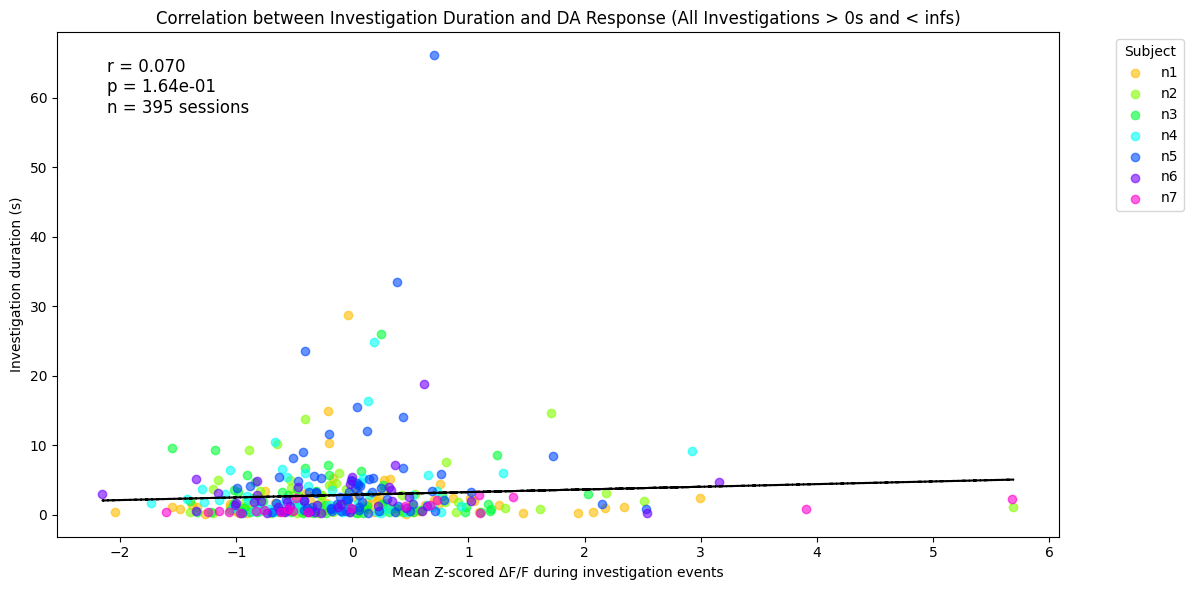

In [13]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

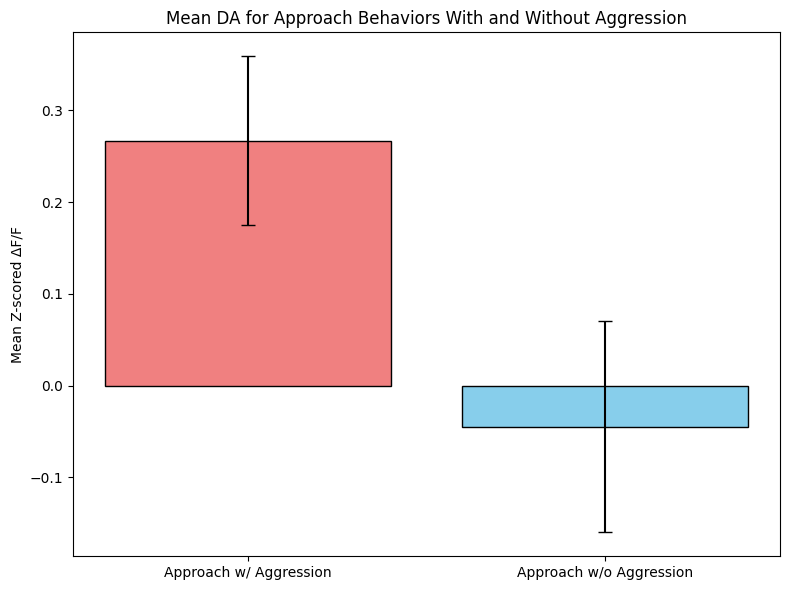

In [14]:
plot_approach_vs_aggression(group_data=group_data, min_duration=0)

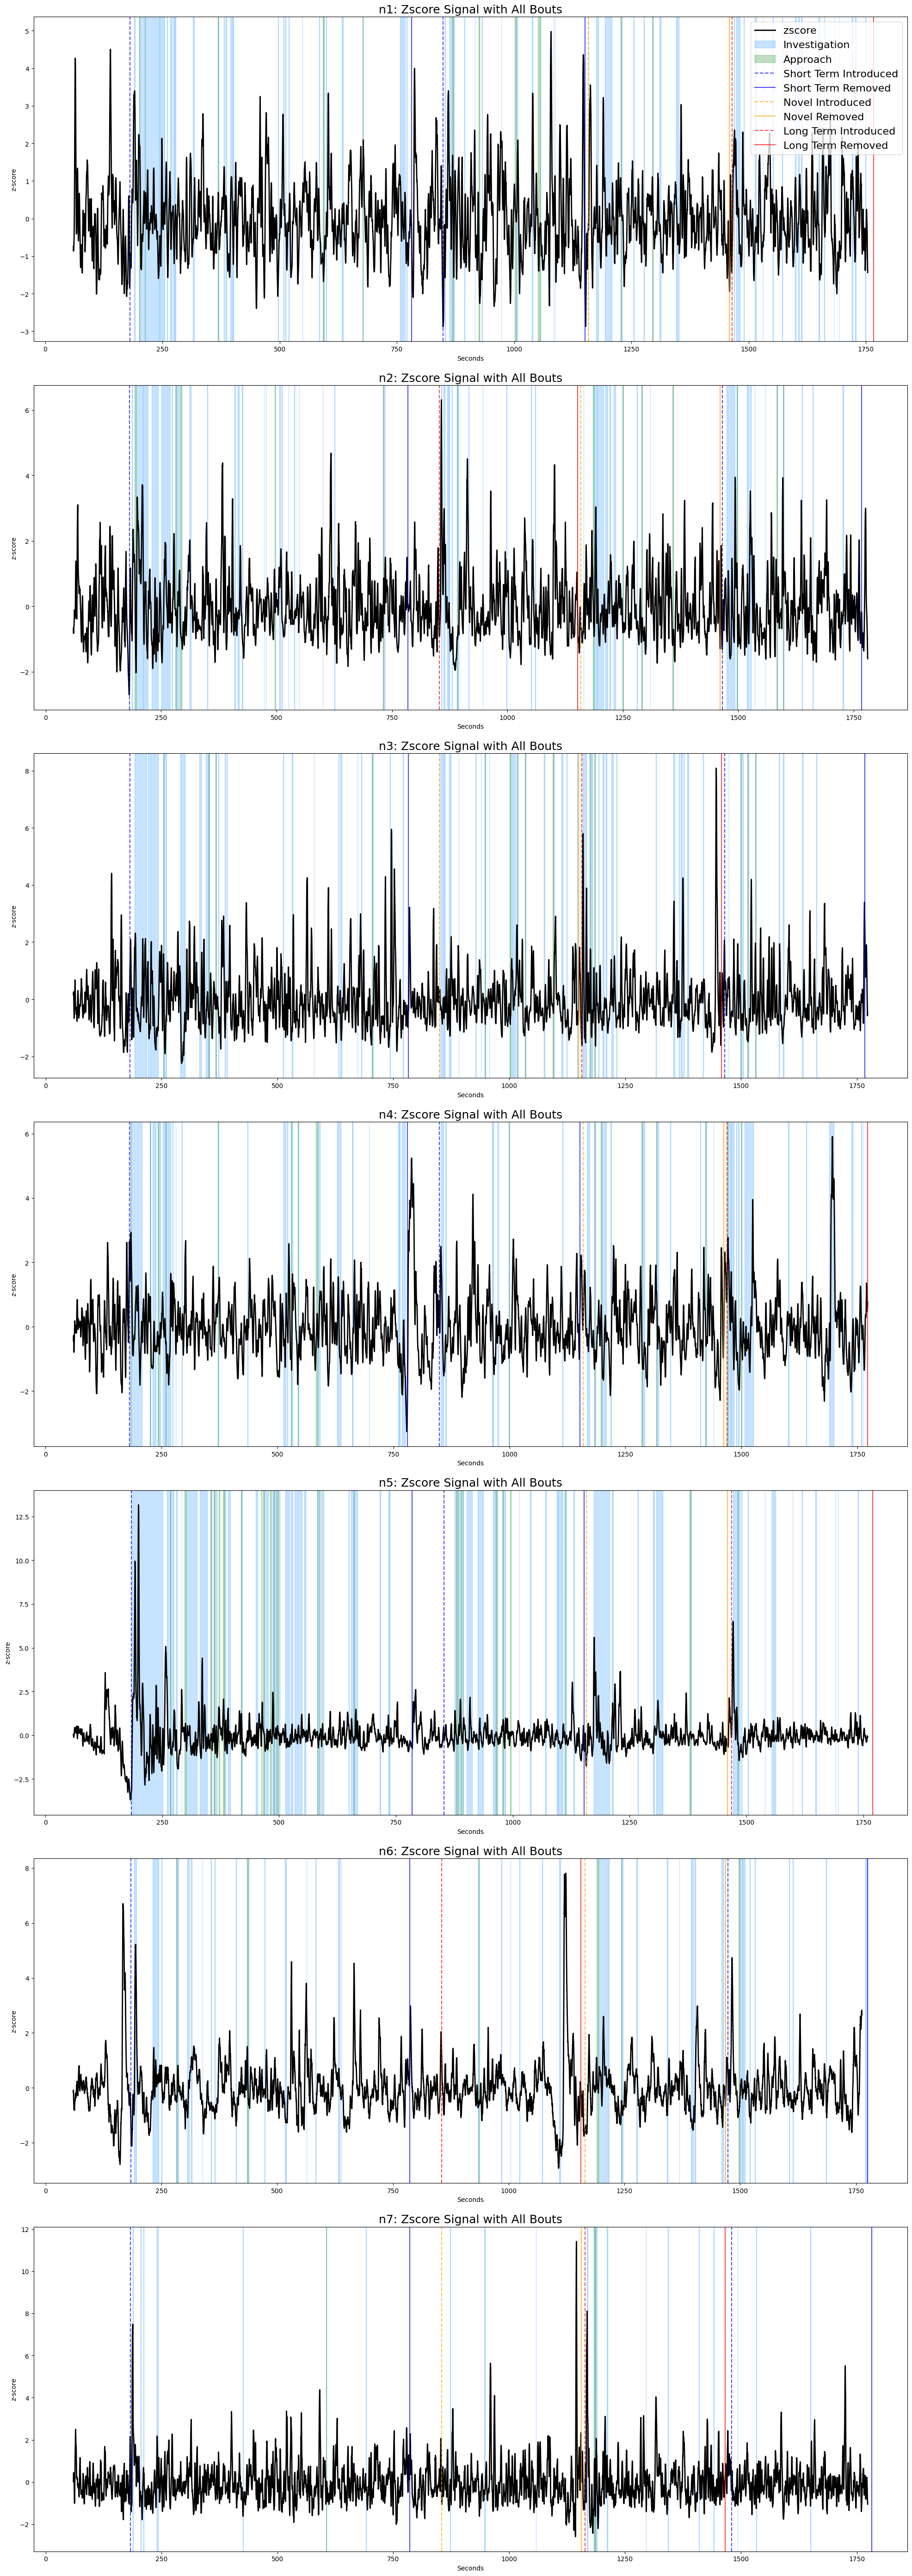

In [15]:
group_data.hc_plot_individual_behavior(behavior_name='all',plot_type='zscore',figsize=(20,8))